In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mpt
import datetime as dt
import matplotlib.dates as mdates
import calendar
import plotly.express as px
import plotly.graph_objects as go

In [2]:
bombing_operation = pd.read_csv("THOR_Vietnam_Bombing_Operations.csv")
aircraf_glossary = pd.read_csv("THOR_Vietnam_Aircraft_Glossary.csv", encoding = "ISO-8859-1")
weapons_glossary = pd.read_csv("THOR_Vietnam_Weapons_Glossary.csv", encoding = "ISO-8859-1")

C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_10432\2690751095.py:1: DtypeWarning: Columns (3,13,18,19,20,22,26,27,29,30,32,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  bombing_operation = pd.read_csv("THOR_Vietnam_Bombing_Operations.csv")


In [3]:
print("BOMBING OPERATION: ",bombing_operation.shape)
print("AIRCRAP GLOSSARY: ",aircraf_glossary.shape)
print("WEAPONS GLOSSARY: ",weapons_glossary.shape)

BOMBING OPERATION:  (4670416, 47)
AIRCRAP GLOSSARY:  (104, 8)
WEAPONS GLOSSARY:  (294, 6)


In [4]:
print(bombing_operation.columns)

Index(['THOR_DATA_VIET_ID', 'COUNTRYFLYINGMISSION', 'MILSERVICE', 'MSNDATE',
       'SOURCEID', 'SOURCERECORD', 'VALID_AIRCRAFT_ROOT', 'TAKEOFFLOCATION',
       'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84', 'TGTTYPE',
       'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE', 'WEAPONTYPECLASS',
       'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL', 'AIRCRAFT_ROOT',
       'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN', 'FLTHOURS', 'MFUNC',
       'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT', 'OPERATIONSUPPORTED',
       'PERIODOFDAY', 'UNIT', 'TGTCLOUDCOVER', 'TGTCONTROL', 'TGTCOUNTRY',
       'TGTID', 'TGTORIGCOORDS', 'TGTORIGCOORDSFORMAT', 'TGTWEATHER',
       'ADDITIONALINFO', 'GEOZONE', 'ID', 'MFUNC_DESC_CLASS',
       'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED', 'RELEASEALTITUDE',
       'RELEASEFLTSPEED', 'RESULTSBDA', 'TIMEOFFTARGET',
       'WEAPONSLOADEDWEIGHT'],
      dtype='object')


In [5]:
print(bombing_operation.isnull().sum())

THOR_DATA_VIET_ID             0
COUNTRYFLYINGMISSION       3615
MILSERVICE                 3249
MSNDATE                       0
SOURCEID                      0
SOURCERECORD                  0
VALID_AIRCRAFT_ROOT           0
TAKEOFFLOCATION            4971
TGTLATDD_DDD_WGS84      1130131
TGTLONDDD_DDD_WGS84     1130131
TGTTYPE                 1830425
NUMWEAPONSDELIVERED           0
TIMEONTARGET              26429
WEAPONTYPE              2403497
WEAPONTYPECLASS         4670416
WEAPONTYPEWEIGHT              0
AIRCRAFT_ORIGINAL           482
AIRCRAFT_ROOT               482
AIRFORCEGROUP           4667508
AIRFORCESQDN            4667634
CALLSIGN                3300321
FLTHOURS                      0
MFUNC                    101111
MFUNC_DESC               104722
MISSIONID                 15670
NUMOFACFT                     0
OPERATIONSUPPORTED      1920049
PERIODOFDAY              199764
UNIT                        493
TGTCLOUDCOVER           2440248
TGTCONTROL              2150583
TGTCOUNT

#### Drop các cột gần như null hoàn toàn, các cột giống nhau, SOURCERECORD và SOURCERECORD là mã lưu trữ và nơi lưu trữ dữ liệu, không có ý nghĩa thống kê

In [3]:
cols_drop = ["WEAPONTYPECLASS","SOURCERECORD","SOURCEID","AIRFORCEGROUP","AIRFORCESQDN","VALID_AIRCRAFT_ROOT","AIRCRAFT_ORIGINAL","TGTID"]
bombing_operation.drop(cols_drop,1,inplace=True)

C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_10432\674742036.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bombing_operation.drop(cols_drop,1,inplace=True)


In [7]:
bombing_operation.head()

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,TGTTYPE,NUMWEAPONSDELIVERED,TIMEONTARGET,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,TAN SON NHUT,NaN,NaN,NaN,0,1005.0,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,NAKHON PHANOM,NaN,NaN,NaN,0,530.0,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,UDORN AB,NaN,NaN,NaN,0,730.0,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,NAKHON PHANOM,16.902500,106.014166,TRUCKS,2,1415.0,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,DANANG,14.945555,108.257222,BASE CAMP AREA,0,1240.0,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0


In [8]:
aircraf_glossary.head()

,GLOSS_ID,VALIDATED_ROOT,AIRCRAFT_NAME,WEBSITE_LINK,AIRCRAFT_TYPE,AIRCRAFT_SHORTNAME,AIRCRAFT_APPLICATION,AC_MISSION_COUNT
0,1,A-1,Douglas A-1 Skyraider,http://www.navalaviationmuseum.org/attractions...,Fighter Jet,Skyraider,FIGHTER,373265
1,2,A-26,Douglas A-26 Invader,http://www.militaryfactory.com/aircraft/detail...,Light Bomber,Invader,BOMBER,36672
2,4,A-37,Cessna A-37 Dragonfly,http://www.militaryfactory.com/aircraft/detail...,Light ground-attack aircraft,Dragonfly,ATTACK,282699
3,5,A-4,McDonnell Douglas A-4 Skyhawk,http://www.fighter-planes.com/info/a4-skyhawk.htm,Fighter Jet,Skyhawk,FIGHTER,390290
4,6,A-5,North American A-5 Vigilante,http://www.militaryfactory.com/aircraft/detail...,Bomber Jet,Vigilante,BOMBER,10


In [9]:
weapons_glossary.head()

,WEAPON_ID,WEAPONTYPE,WEAPONTYPE_COMMON_NAME,WEAPON_CLASS,WEAPONTYPE_DESC,WEAPON_COUNT
0,1,100 GP,General Purpose Bomb,BOMB,100 lb general purpose,1
1,2,1000 G,Megaboller flash powder bomb,BOMB,1000 g BKS,2
2,3,1000LB GP M-65,An-M65,BOMB,1000 lb general purpose,12776
3,4,1000LB MK-83,Mark 83 bomb,BOMB,1000 lb none guidence general purpose bomb,15522
4,5,1000LB SAP M59,AN-M59,BOMB,1000 lb semi-armor piercing bomb,454


### Xử lý dữ liệu cột MSNDATE

In [4]:
bombing_operation['MSNDATE'] = bombing_operation['MSNDATE'].astype(str)
def convert(x):
    try:
        x['MSNDATE'] = pd.to_datetime(x['MSNDATE'], format='%Y-%m-%d')
    except:
        x['MSNDATE'] = pd.to_datetime(x['MSNDATE'], format='%Y-%m-%d', errors='coerce')
    return x
convert(bombing_operation)

,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,TGTTYPE,NUMWEAPONSDELIVERED,TIMEONTARGET,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,TAN SON NHUT,NaN,NaN,NaN,0,1005.0,...,NaN,27135863,NONKINETIC,-1,-1,NaN,NaN,NaN,1005.0,0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,NAKHON PHANOM,NaN,NaN,NaN,0,530.0,...,NaN,27131177,NONKINETIC,-1,-1,NaN,NaN,NaN,530.0,0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,UDORN AB,NaN,NaN,NaN,0,730.0,...,NaN,27131178,NONKINETIC,-1,-1,NaN,NaN,NaN,730.0,0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,NAKHON PHANOM,16.902500,106.014166,TRUCKS,2,1415.0,...,XE,27131179,KINETIC,-1,-1,NaN,NaN,SECONDARY FIRE,1415.0,17400
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,DANANG,14.945555,108.257222,BASE CAMP AREA,0,1240.0,...,ZB,27131180,KINETIC,-1,-1,NaN,NaN,RNO WEATHER,1240.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670411,4651825,UNITED STATES OF AMERICA,USAF,1971-10-19,DANANG,15.292777,107.137500,NaN,4,725.0,...,YB,27030057,KINETIC,-1,-1,NaN,NaN,NaN,725.0,82080
4670412,4651905,UNITED STATES OF AMERICA,USAF,1972-01-21,UBON AB,19.589166,103.438888,NaN,92,1506.0,...,UG,27030137,KINETIC,-1,-1,NaN,NaN,NaN,1506.0,0
4670413,4651925,VIETNAM (SOUTH),VNAF,1971-07-01,NHA TRANG,14.027222,109.156111,NaN,4,1000.0,...,BR,27030157,KINETIC,-1,-1,NaN,NaN,DESTROYED,1000.0,17240
4670414,4652229,UNITED STATES OF AMERICA,USAF,1970-02-28,PHAN RANG,NaN,NaN,NaN,0,800.0,...,NaN,27030461,KINETIC,-1,-1,NaN,NaN,NaN,800.0,0


### Thêm cột tổng khối lượng bom

In [5]:
bombing_operation['TOTALBOMWEIGHT'] = (bombing_operation["NUMWEAPONSDELIVERED"].astype(int) * 
                                       bombing_operation["WEAPONTYPEWEIGHT"].astype(int) * 
                                       0.45359237)/1000
bombing_operation['TOTALBOMWEIGHT'].head(10)

0    0.000000
1    0.000000
2    0.000000
3    0.680389
4    0.000000
5    1.360777
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: TOTALBOMWEIGHT, dtype: float64

#### Thời gian bắt đầu và kết thúc của bộ dữ liệu

In [11]:
time = bombing_operation["MSNDATE"]
print(time.min())
print(time.max())

1965-06-01 00:00:00
1975-06-30 00:00:00


## Khái quát lịch sử Việt Nam trong giai đoạn 1965-1975

#### Chiến tranh có các loại nhiệm vụ nào?

In [50]:
list(bombing_operation['MFUNC_DESC_CLASS'].unique())

['NONKINETIC', 'KINETIC']

#### Tổng khối lượng bom trong chiến tranh Việt Nam, đơn vị tấn (đơn vị của bộ dữ liệu là pound)

In [12]:
sumbom = (bombing_operation["NUMWEAPONSDELIVERED"].astype(int) * bombing_operation["WEAPONTYPEWEIGHT"].astype(int) * 0.45359237).sum()
sumbom = sumbom/1000
sumbom

7454514.327816471

#### Số loại vũ khí và máy bay được sử dụng

In [13]:
bombing_operation["WEAPONTYPE"].nunique()

294

In [14]:
bombing_operation["AIRCRAFT_ROOT"].nunique()

190

#### Loại vũ khí được sử dụng nhiều nhất và ít nhất

In [15]:
minbom = weapons_glossary.loc[weapons_glossary["WEAPON_COUNT"] == weapons_glossary["WEAPON_COUNT"].min()]
minbom[["WEAPONTYPE_COMMON_NAME","WEAPON_COUNT"]].dropna()

,WEAPONTYPE_COMMON_NAME,WEAPON_COUNT
0,General Purpose Bomb,1
64,AIM-26B Falcon,1
81,BLU-43/B,1
84,BLU-73/B,1
85,BLU-82/B,1
106,CBU-23/B,1
124,CBU-39/A,1
169,M117 bomb,1
193,MK 65,1
195,AN-M66,1


In [16]:
maxbom = weapons_glossary.loc[weapons_glossary["WEAPON_COUNT"] == weapons_glossary["WEAPON_COUNT"].max()]
maxbom[["WEAPONTYPE_COMMON_NAME","WEAPON_COUNT"]]

,WEAPONTYPE_COMMON_NAME,WEAPON_COUNT
40,Mk 82,408323


#### Số lượng cụ thể của từng loại vũ khí

In [17]:
weapon = list(weapons_glossary["WEAPON_CLASS"].unique())
weapon

['BOMB', 'GUN', 'ROCKET', 'SUPPORT', 'MISSILE']

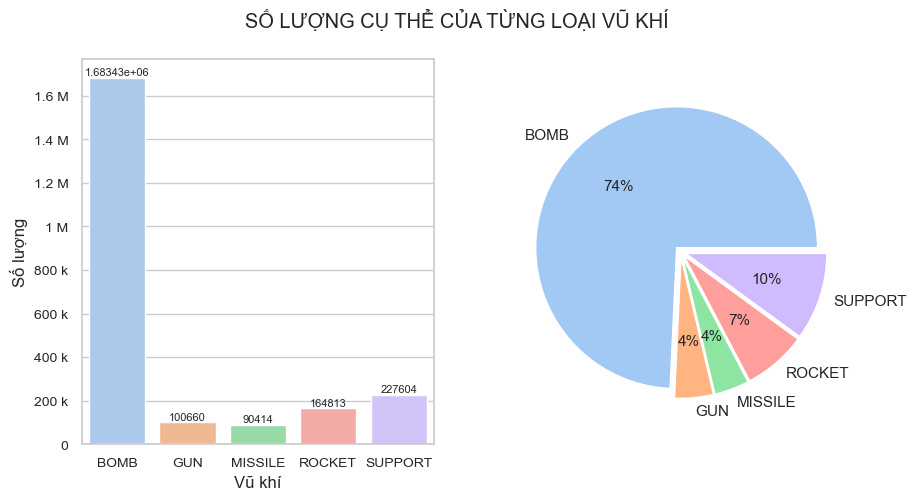

In [19]:
df2 = weapons_glossary.groupby(["WEAPON_CLASS"],as_index=False).sum()
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(10,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x="WEAPON_CLASS", y="WEAPON_COUNT", data=df2, ax=ax[0])
ax[0].yaxis.set_major_formatter(mpt.EngFormatter())
ax[0].tick_params(axis="x",labelsize=10)
ax[0].tick_params(axis="y",labelsize=10)
ax[0].set_xlabel("Vũ khí", fontsize=12)
ax[0].set_ylabel("Số lượng", fontsize=12)
for i in ax[0].containers:
    ax[0].bar_label(i,fontsize=8)
explode = (0.04, 0.04, 0.04, 0.04, 0.04)
plt.pie(x="WEAPON_COUNT", labels="WEAPON_CLASS",data=df2, colors=sns.color_palette("pastel"), explode=explode, autopct='%.0f%%',  textprops={'fontsize': 11})
fig.suptitle("SỐ LƯỢNG CỤ THỂ CỦA TỪNG LOẠI VŨ KHÍ");

#### Không khớp giữa hai tệp giữ liệu aircraft và boombing nên không thể thống kê được

#### Thống kê số lượng bom và máy bay được sử dụng cho mỗi nhiệm vụ

In [20]:
print(bombing_operation["NUMWEAPONSDELIVERED"].mean())
print(bombing_operation["NUMWEAPONSDELIVERED"].median())
print(bombing_operation["NUMWEAPONSDELIVERED"].min())
print(bombing_operation["NUMWEAPONSDELIVERED"].max())

19.285447805934204
1.0
0
9999


#### Khối lượng thả bom trong giai đoạn 1965-1975

In [6]:
weight_drop = bombing_operation[['MSNDATE','TOTALBOMWEIGHT']].dropna()
weight_drop['MSNDATE'] = weight_drop['MSNDATE'].dt.to_period('Y')
weight_drop = weight_drop.groupby('MSNDATE', as_index=False).sum()
weight_drop.sort_values('MSNDATE')
# weight_drop['MSNDATE'] = weight_drop['MSNDATE'].dt.to_timestamp()

,MSNDATE,TOTALBOMWEIGHT
0,1965,8.827027e+04
1,1966,3.589132e+05
2,1967,6.426125e+05
3,1968,1.085585e+06
4,1969,9.953371e+05
5,1970,1.326644e+06
6,1971,1.016483e+06
7,1972,1.366664e+06
8,1973,5.338170e+05
9,1974,2.875354e+04


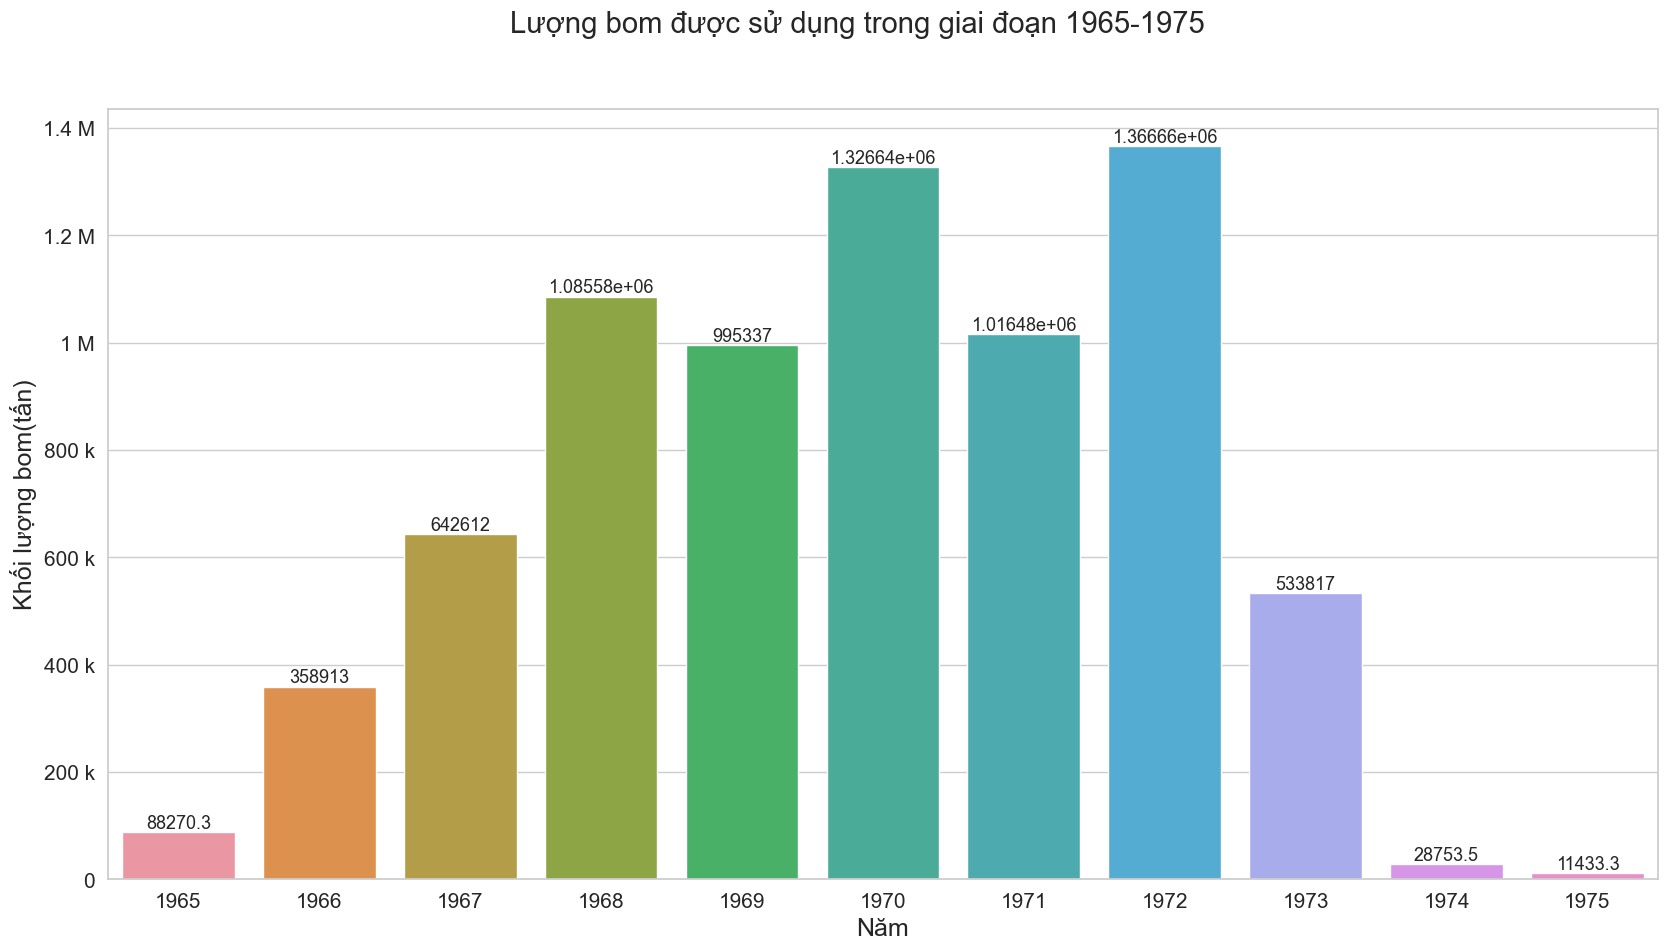

In [48]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='MSNDATE', y='TOTALBOMWEIGHT', data=weight_drop)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=13)
ax.tick_params(axis="x",labelsize=15)
ax.tick_params(axis="y",labelsize=15)
ax.set_xlabel("Năm", fontsize=18)
ax.set_ylabel("Khối lượng bom(tấn)", fontsize=18)
fig.suptitle("Lượng bom được sử dụng trong giai đoạn 1965-1975", fontsize = 21);

## Câu hỏi

### Đất nước nào thực hiện nhiều nhiệm vụ nhất chiến tranh Việt Nam?

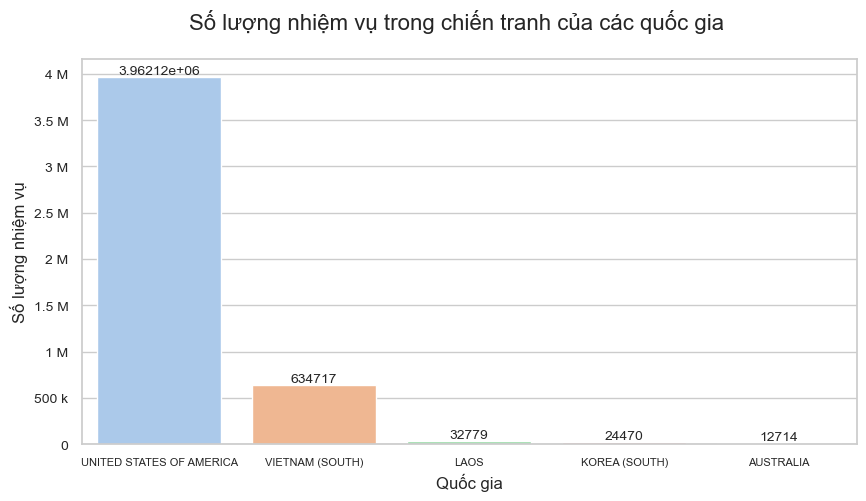

In [21]:
count = bombing_operation["COUNTRYFLYINGMISSION"].value_counts()
index, y = count.keys().tolist(), count.values
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=index, y=y)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=8)
ax.tick_params(axis="y",labelsize=10)
ax.set_xlabel("Quốc gia", fontsize=12)
ax.set_ylabel("Số lượng nhiệm vụ", fontsize=12)
fig.suptitle("Số lượng nhiệm vụ trong chiến tranh của các quốc gia", fontsize = 16);

### 5 loại máy bay nào được sử dụng nhiều nhất?

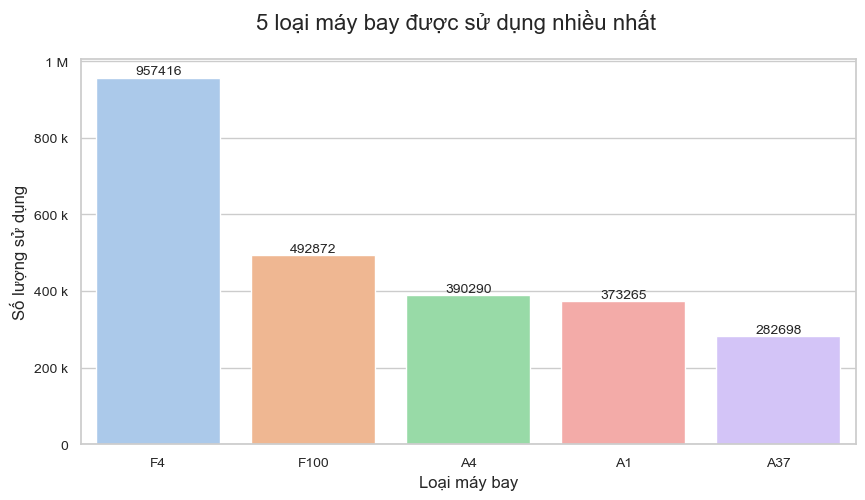

In [22]:
count_a = bombing_operation["AIRCRAFT_ROOT"].value_counts()
index_a, y_a = count_a.keys().tolist(), count_a.values
index_a = index_a[:5]
y_a = y_a[:5]
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=index_a, y=y_a)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)
ax.set_xlabel("Loại máy bay", fontsize=12)
ax.set_ylabel("Số lượng sử dụng", fontsize=12)
fig.suptitle("5 loại máy bay được sử dụng nhiều nhất", fontsize = 16);

### Đất nước nào thả bom nhiều nhất trong chiến tranh?

In [23]:
bom_dropped = bombing_operation[["COUNTRYFLYINGMISSION","NUMWEAPONSDELIVERED","WEAPONTYPEWEIGHT"]].dropna()
bom_dropped["BOM_DROPPED"] = (bom_dropped["NUMWEAPONSDELIVERED"].astype(int) * bom_dropped["WEAPONTYPEWEIGHT"].astype(int) * 0.45359237)/1000
bom_dropped=bom_dropped.groupby(["COUNTRYFLYINGMISSION"], as_index=False).sum()
bom_dropped

,COUNTRYFLYINGMISSION,NUMWEAPONSDELIVERED,WEAPONTYPEWEIGHT,BOM_DROPPED
0,AUSTRALIA,346391,432274,1.182463e+03
1,KOREA (SOUTH),206341,52782,5.148106e+02
2,LAOS,979818,138008,1.247955e+03
3,UNITED STATES OF AMERICA,74274908,834596268,7.053696e+06
4,VIETNAM (SOUTH),13908484,54726261,3.978720e+05


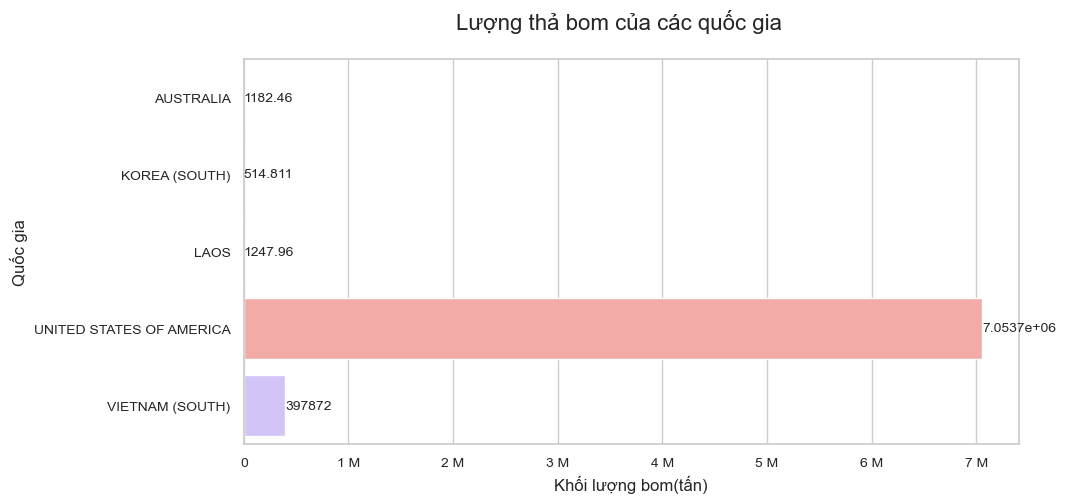

In [24]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="BOM_DROPPED", y="COUNTRYFLYINGMISSION", data=bom_dropped)
ax.xaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)
ax.set_xlabel("Khối lượng bom(tấn)", fontsize=12)
ax.set_ylabel("Quốc gia", fontsize=12)
fig.suptitle("Lượng thả bom của các quốc gia", fontsize = 16);

### Đất nước nào bị ảnh hưởng nặng nề nhất trong chiến tranh Việt Nam?

In [25]:
affect = bombing_operation[["TGTCOUNTRY","NUMWEAPONSDELIVERED"]].dropna()
affect=affect.groupby(["TGTCOUNTRY"], as_index=False).sum()
affect

,TGTCOUNTRY,NUMWEAPONSDELIVERED
0,CAMBODIA,8324562
1,LAOS,20646027
2,NORTH VIETNAM,4824667
3,PHILLIPINES,0
4,SOUTH VIETNAM,54549042
5,THAILAND,795118
6,UNKNOWN,195
7,WESTPAC WATERS,173


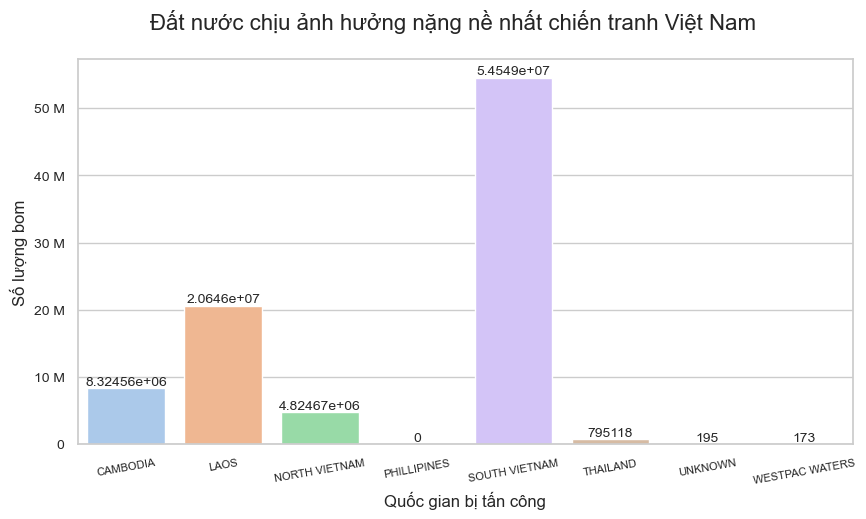

In [26]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="TGTCOUNTRY", y="NUMWEAPONSDELIVERED", data=affect)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=8,labelrotation=10)
ax.tick_params(axis="y",labelsize=10)
ax.set_xlabel("Quốc gian bị tấn công", fontsize=12)
ax.set_ylabel("Số lượng bom", fontsize=12)
fig.suptitle("Đất nước chịu ảnh hưởng nặng nề nhất chiến tranh Việt Nam", fontsize = 16);

### 15 loại hình nhiệm vụ nào được sử dụng nhiều nhất trong chiến tranh Việt Nam ?

In [27]:
mtype = bombing_operation[['MFUNC_DESC','MFUNC_DESC_CLASS']].dropna()
mtype = mtype.groupby(['MFUNC_DESC_CLASS','MFUNC_DESC'], as_index=False).size()
sum_mtype = mtype["size"].sum()
mtype["PERCENTAGE"] = mtype["size"] / sum_mtype * 100
mtype.sort_values("size", inplace=True, ascending=False)
mtype = mtype[:15]
mtype.head(5)

,MFUNC_DESC_CLASS,MFUNC_DESC,size,PERCENTAGE
14,KINETIC,STRIKE,1007674,22.070555
5,KINETIC,CLOSE AIR SUPPORT,850726,18.633005
1,KINETIC,AIR INTERDICTION,454388,9.952222
3,KINETIC,ARMED RECCE,418330,9.162462
7,KINETIC,DIRECT AIR SUPPORT,320026,7.009362


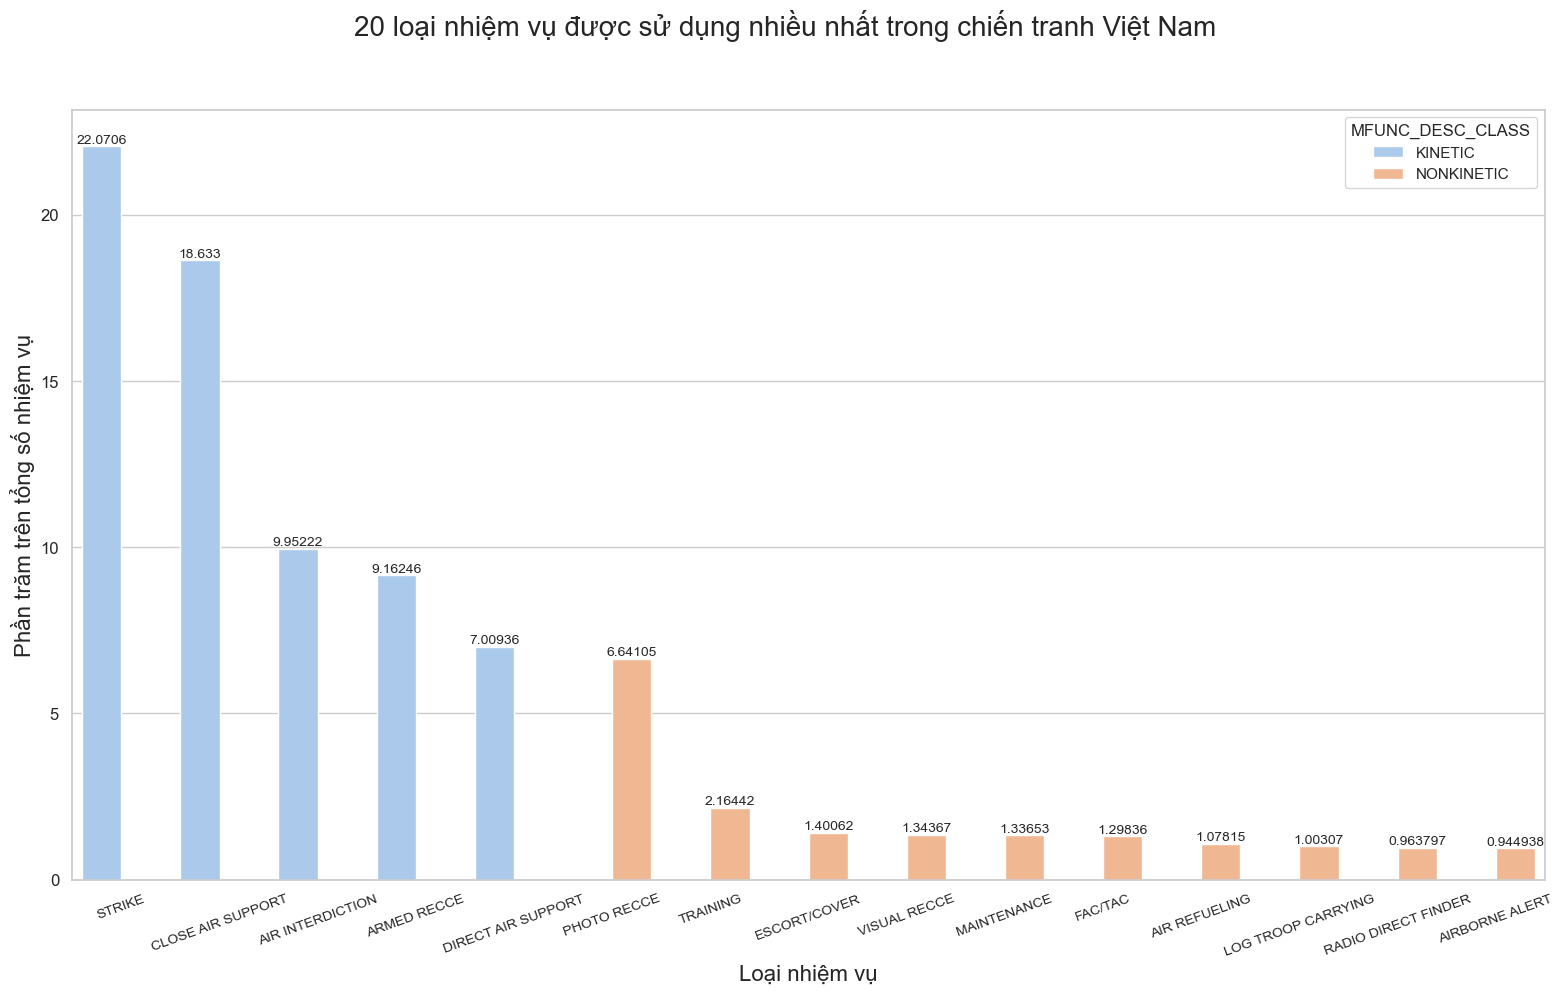

In [28]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(19,10))
ax = sns.barplot(x="MFUNC_DESC", y="PERCENTAGE", hue="MFUNC_DESC_CLASS", data=mtype)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=10,labelrotation=20)
ax.tick_params(axis="y",labelsize=12)
ax.set_xlabel("Loại nhiệm vụ", fontsize=16)
ax.set_ylabel("Phần trăm trên tổng số nhiệm vụ", fontsize=16)
fig.suptitle("20 loại nhiệm vụ được sử dụng nhiều nhất trong chiến tranh Việt Nam", fontsize = 20);

### Mỗi loại máy bay phù hợp dùng cho những nhiệm vụ gì?

In [29]:
apm = bombing_operation[['MFUNC_DESC','AIRCRAFT_ROOT']].dropna()
apm = apm.groupby(['AIRCRAFT_ROOT','MFUNC_DESC'],as_index=False).size()
apm = apm[apm["size"]>17000]
apm.sort_values("AIRCRAFT_ROOT")
apm["MARGIN"] = apm["size"]
apm["MARGIN"] = 0
apm.head(10)

,AIRCRAFT_ROOT,MFUNC_DESC,size,MARGIN
10,A1,AIR INTERDICTION,71671,0
14,A1,ARMED RECCE,44843,0
18,A1,CLOSE AIR SUPPORT,69291,0
28,A1,DIRECT AIR SUPPORT,41063,0
70,A1,STRIKE,92660,0
90,A26,STRIKE,25234,0
117,A37,AIR INTERDICTION,70080,0
122,A37,CLOSE AIR SUPPORT,173107,0
168,A4,ARMED RECCE,74510,0
172,A4,CLOSE AIR SUPPORT,66090,0


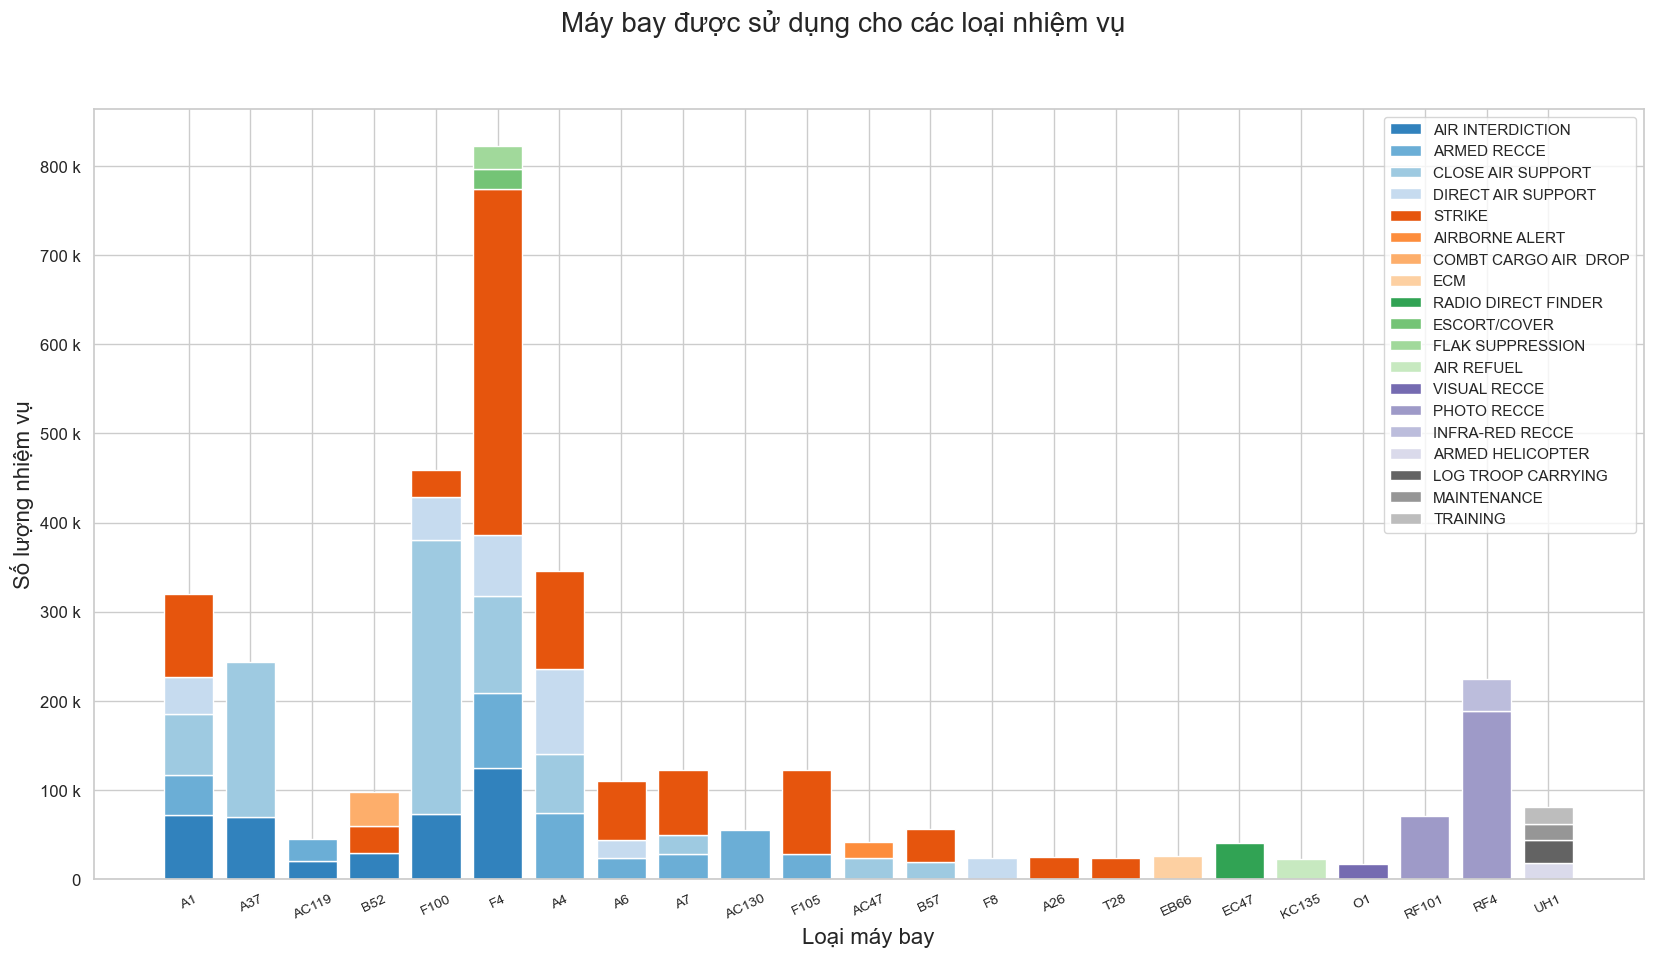

In [30]:
legend = apm["AIRCRAFT_ROOT"].drop_duplicates()
msn = apm["MFUNC_DESC"].drop_duplicates()
fig, ax = plt.subplots(figsize=(20,10))
num_clors = len(msn)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/num_clors) for i in range(num_clors)])
label_msn = []
p_msn = []
for m in msn:
    sub = apm.loc[apm["MFUNC_DESC"] == m]
    p1 = ax.bar(sub["AIRCRAFT_ROOT"], sub["size"], bottom=sub["MARGIN"])
    label_msn.append(m)
    p_msn.append(p1)
    for a in legend:
        if sub["AIRCRAFT_ROOT"].isin([a]).any():
            apm.loc[apm["AIRCRAFT_ROOT"] == a, "MARGIN"] += sub.loc[sub["AIRCRAFT_ROOT"] == a, "size"].item()
ax.legend(p_msn, label_msn)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
ax.tick_params(axis="x",labelsize=10,labelrotation=25)
ax.tick_params(axis="y",labelsize=12)
ax.set_xlabel("Loại máy bay", fontsize=16)
ax.set_ylabel("Số lượng nhiệm vụ", fontsize=16)
fig.suptitle("Máy bay được sử dụng cho các loại nhiệm vụ", fontsize = 20);

### Số lượng thả bom của từng loại máy bay trên mỗi loại nhiệm vụ là bao nhiêu?

In [9]:
bpa = bombing_operation[["NUMWEAPONSDELIVERED","AIRCRAFT_ROOT","MFUNC_DESC"]].dropna()
bpa = bpa.groupby(["MFUNC_DESC","AIRCRAFT_ROOT"], as_index=False).sum()
bpa = bpa[bpa["NUMWEAPONSDELIVERED"] >= 60000]
bpa.sort_values("AIRCRAFT_ROOT",inplace=True)
bpa["MARGIN"] = bpa["NUMWEAPONSDELIVERED"]
bpa["MARGIN"] = 0
bpa.head(5)

,MFUNC_DESC,AIRCRAFT_ROOT,NUMWEAPONSDELIVERED,MARGIN
414,CLOSE AIR SUPPORT,A1,570940,0
1970,STRIKE,A1,511966,0
640,DIRECT AIR SUPPORT,A1,349702,0
147,AIR INTERDICTION,A1,620114,0
305,ARMED RECCE,A1,371918,0


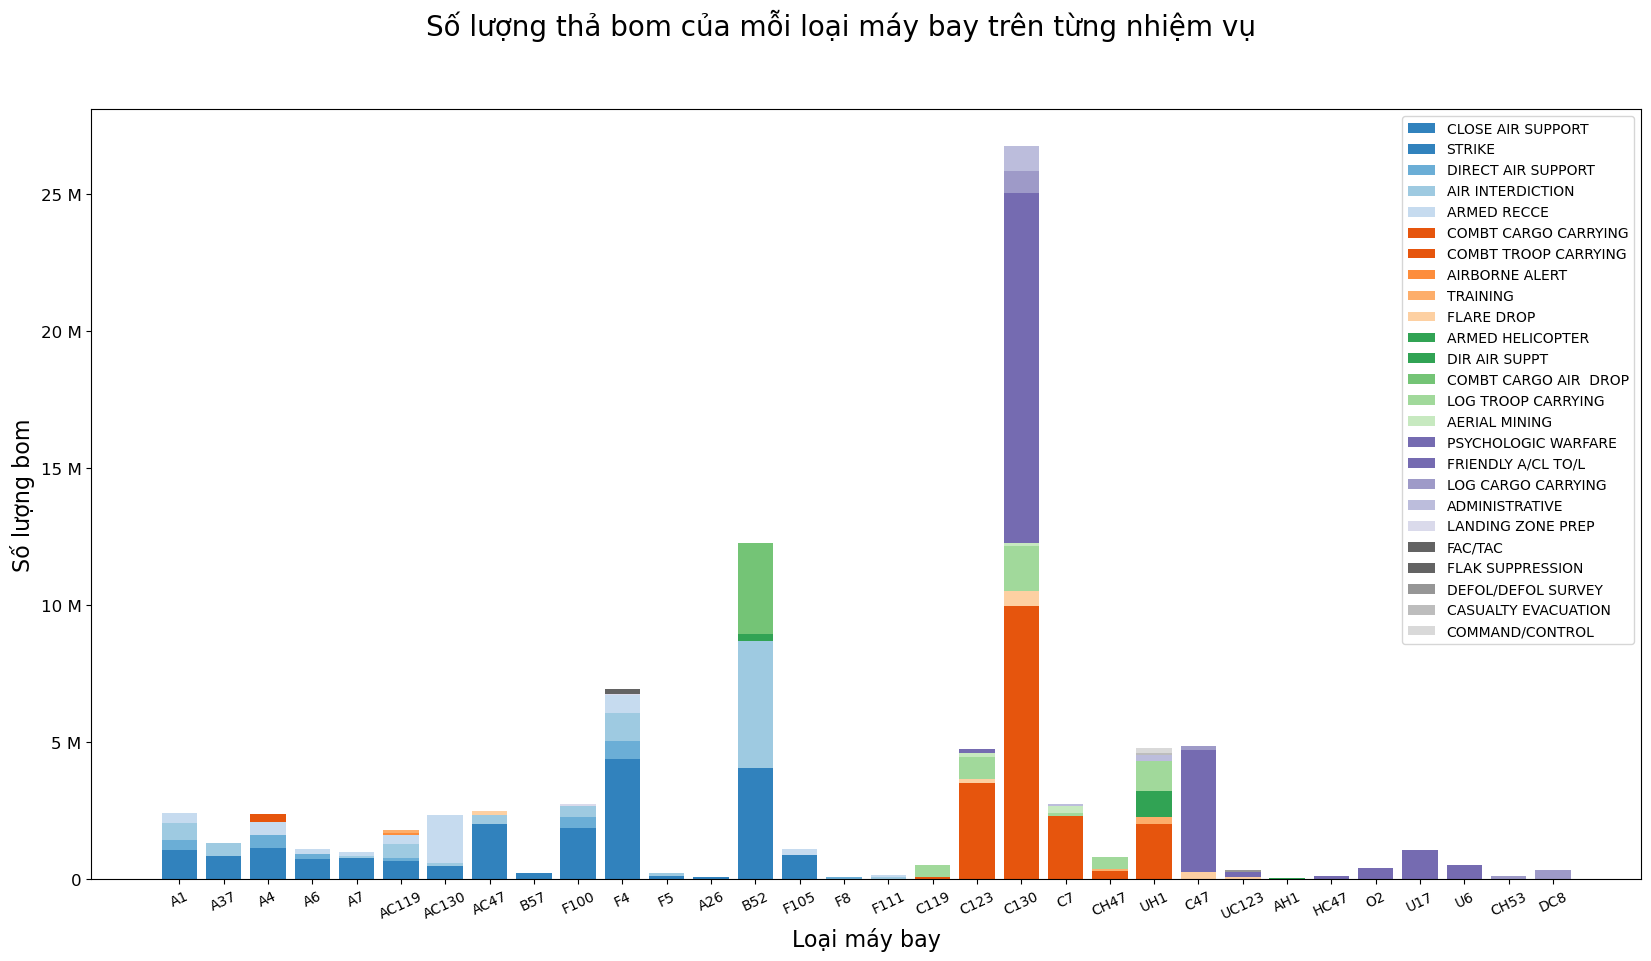

In [10]:
legend = bpa["AIRCRAFT_ROOT"].drop_duplicates()
msn = bpa["MFUNC_DESC"].drop_duplicates()
fig, ax = plt.subplots(figsize=(20,10))
num_clors = len(msn)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/num_clors) for i in range(num_clors)])
label_msn = []
p_msn = []
for m in msn:
    sub = bpa.loc[bpa["MFUNC_DESC"] == m]
    p1 = ax.bar(sub["AIRCRAFT_ROOT"], sub["NUMWEAPONSDELIVERED"], bottom=sub["MARGIN"])
    label_msn.append(m)
    p_msn.append(p1)
    for a in legend:
        if sub["AIRCRAFT_ROOT"].isin([a]).any():
            bpa.loc[bpa["AIRCRAFT_ROOT"] == a, "MARGIN"] += sub.loc[sub["AIRCRAFT_ROOT"] == a, "NUMWEAPONSDELIVERED"].item()
ax.legend(p_msn, label_msn)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
ax.tick_params(axis="x",labelsize=10,labelrotation=25)
ax.tick_params(axis="y",labelsize=12)
ax.set_xlabel("Loại máy bay", fontsize=16)
ax.set_ylabel("Số lượng bom", fontsize=16)
fig.suptitle("Số lượng thả bom của mỗi loại máy bay trên từng nhiệm vụ", fontsize = 20);

### Địa điểm nào là nơi cất cánh phổ biến nhất trong chiến tranh việt nam?

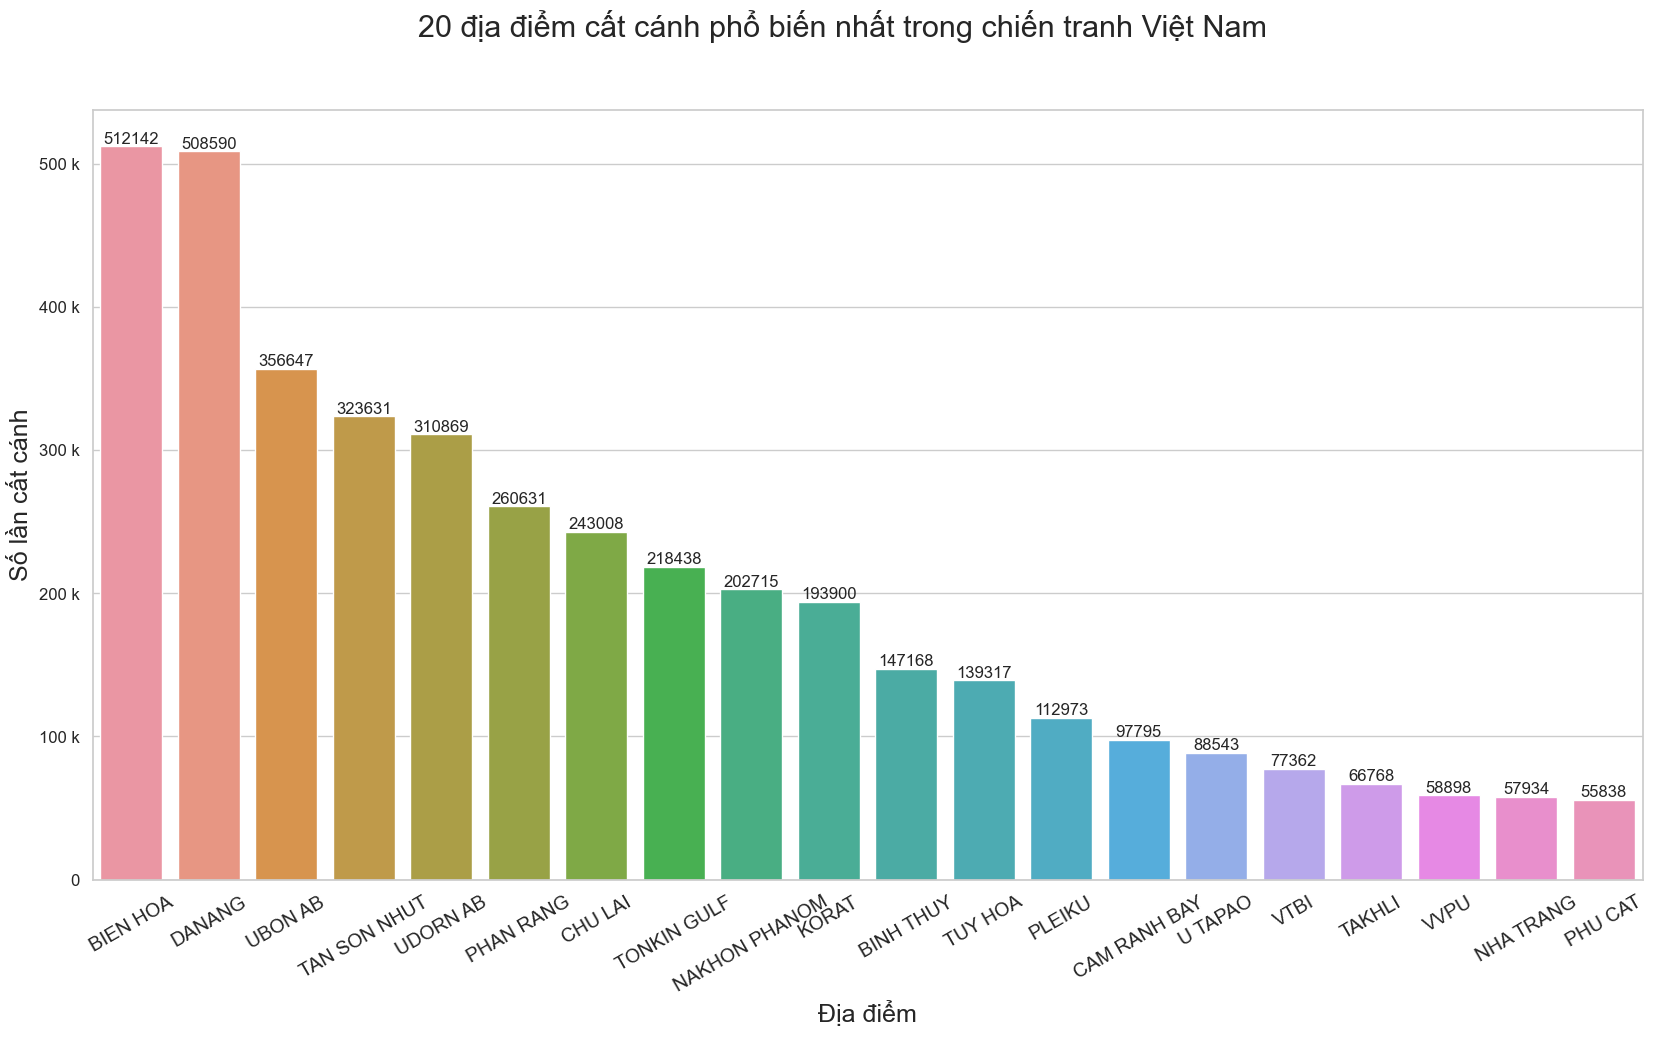

In [33]:
common_to = bombing_operation[["TAKEOFFLOCATION"]].dropna()
common_to = common_to.groupby(["TAKEOFFLOCATION"], as_index=False).size()
common_to.sort_values("size",ascending=False, inplace=True)
common_to = common_to[:20]
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="TAKEOFFLOCATION", y="size", data=common_to)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=12)
ax.tick_params(axis="x",labelsize=14,labelrotation=30)
ax.tick_params(axis="y",labelsize=12)
ax.set_xlabel("Địa điểm", fontsize=18)
ax.set_ylabel("Số lần cất cánh", fontsize=18)
fig.suptitle("20 địa điểm cất cánh phổ biến nhất trong chiến tranh Việt Nam", fontsize = 22);

### Số hoạt động quân sự theo từng năm của mỗi quốc gia là bao nhiêu?

In [51]:
total_m = bombing_operation[['MSNDATE','COUNTRYFLYINGMISSION']].dropna()
total_m['MSNDATE'] = total_m['MSNDATE'].dt.to_period('Y')
total_m = total_m.groupby(['MSNDATE','COUNTRYFLYINGMISSION'], as_index=False).size()
total_m.sort_values('MSNDATE')
total_m['MSNDATE'] = total_m['MSNDATE'].dt.to_timestamp()

C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_1652\3545233641.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(total_m.loc[total_m['COUNTRYFLYINGMISSION'] == country]['MSNDATE'], total_m.loc[total_m['COUNTRYFLYINGMISSION'] == country]['size'],'go-', color = color[i], label="%s" % country, markersize=6)


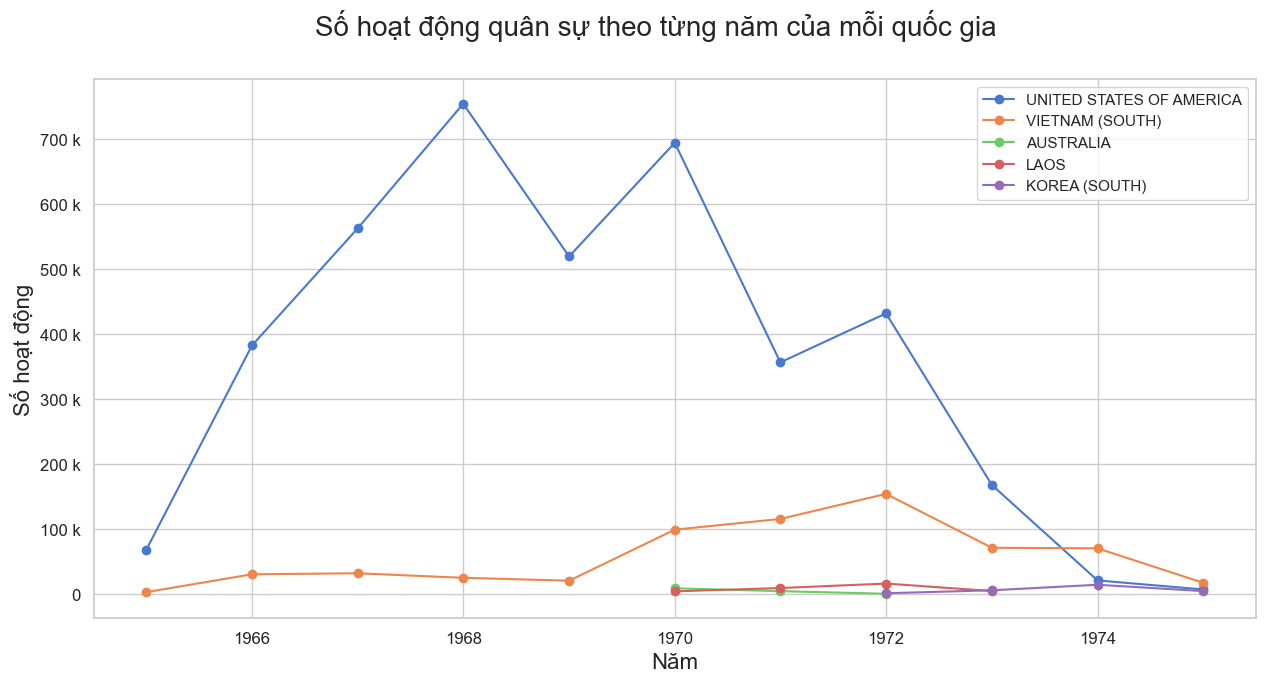

In [52]:
color = list(sns.color_palette('muted'))
fig, ax = plt.subplots(figsize=(15,7))
for i, country in enumerate(total_m['COUNTRYFLYINGMISSION'].unique()):
    ax.plot(total_m.loc[total_m['COUNTRYFLYINGMISSION'] == country]['MSNDATE'], total_m.loc[total_m['COUNTRYFLYINGMISSION'] == country]['size'],'go-', color = color[i], label="%s" % country, markersize=6)
ax.legend()
ax.yaxis.set_major_formatter(mpt.EngFormatter())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel("Năm", fontsize=16)
ax.set_ylabel("Số hoạt động", fontsize=16)
plt.grid(True)
fig.suptitle("Số hoạt động quân sự theo từng năm của mỗi quốc gia", fontsize=20);

### Số lượng bom được thả theo từng năm của mỗi quốc gia là bao nhiêu?

In [53]:
total_opr = bombing_operation[['MSNDATE','COUNTRYFLYINGMISSION','TOTALBOMWEIGHT']].dropna()
total_opr['MSNDATE'] = total_opr['MSNDATE'].dt.to_period('Y')
total_opr = total_opr.groupby(['MSNDATE','COUNTRYFLYINGMISSION'], as_index=False).sum()
total_opr.sort_values('MSNDATE')
total_opr['MSNDATE'] = total_opr['MSNDATE'].dt.to_timestamp()

C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_1652\3622828988.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(total_opr.loc[total_opr['COUNTRYFLYINGMISSION'] == country]['MSNDATE'], total_opr.loc[total_opr['COUNTRYFLYINGMISSION'] == country]['NUMWEAPONSDELIVERED'],'go-', color = color[i], label="%s" % country, markersize=6)


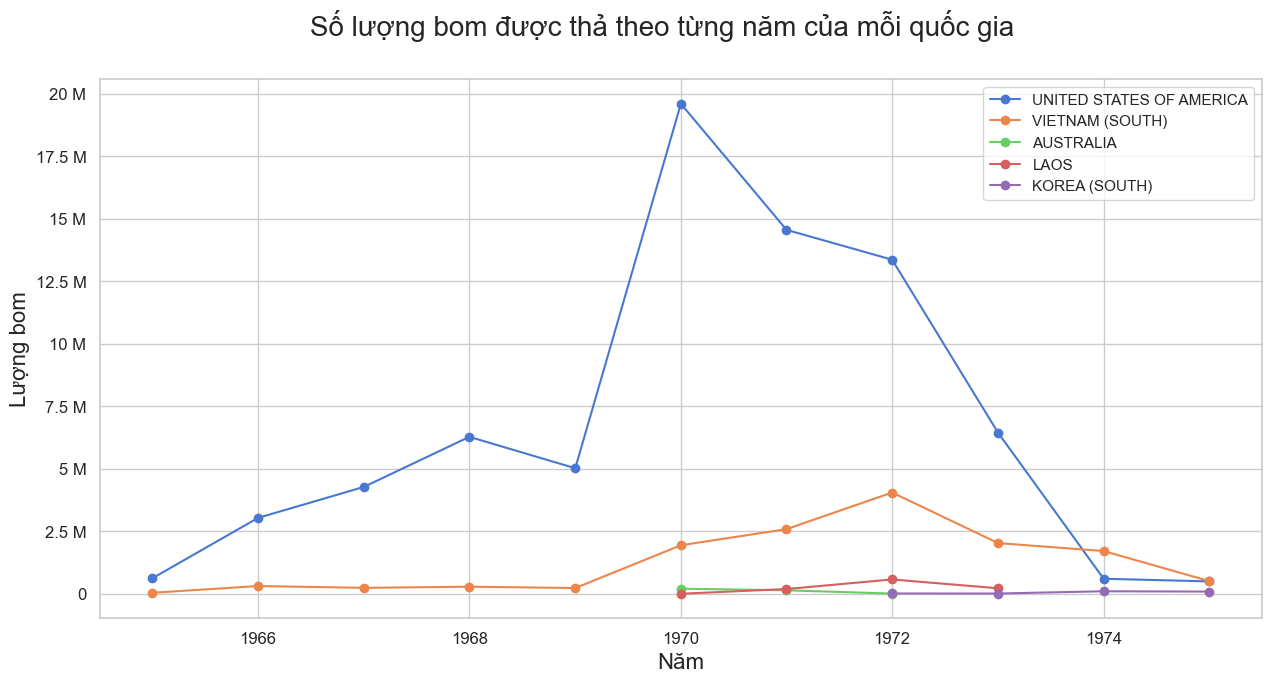

In [54]:
color = list(sns.color_palette('muted'))
fig, ax = plt.subplots(figsize=(15,7))
for i, country in enumerate(total_opr['COUNTRYFLYINGMISSION'].unique()):
    ax.plot(total_opr.loc[total_opr['COUNTRYFLYINGMISSION'] == country]['MSNDATE'], total_opr.loc[total_opr['COUNTRYFLYINGMISSION'] == country]['NUMWEAPONSDELIVERED'],'go-', color = color[i], label="%s" % country, markersize=6)
ax.legend()
ax.yaxis.set_major_formatter(mpt.EngFormatter())
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel("Năm", fontsize=16)
ax.set_ylabel("Lượng bom", fontsize=16)
plt.grid(True)
fig.suptitle("Số lượng bom được thả theo từng năm của mỗi quốc gia", fontsize=20);

### Tháng nào trong năm diễn ra nhiều hoạt động quân sự nhất?

In [18]:
total_m = bombing_operation[['MSNDATE','MFUNC_DESC_CLASS']]
total_m['month'] = total_m['MSNDATE'].dt.month
total_m['MSNDATE'] = total_m['MSNDATE'].dt.to_period('Y')
total_f = total_m
total_m = total_m.groupby(['MSNDATE','month'], as_index = False).count()
y_u = total_m['MSNDATE'].unique()
m_u = pd.DataFrame()
for i in y_u:
    sub = total_m.loc[total_m['MSNDATE'] == i]
    tam = sub.loc[sub['MFUNC_DESC_CLASS'] == sub['MFUNC_DESC_CLASS'].max()]
    m_u = pd.concat([m_u,tam])
totalfp = pd.DataFrame()
totalfp = total_f.loc[total_f['MFUNC_DESC_CLASS'] == 'KINETIC']
totalfp = totalfp.groupby(['MSNDATE','month'], as_index = False).count()
m_f = m_u['month'].to_numpy()
f_u = pd.DataFrame()
for i in range(len(y_u)):
    sub = totalfp.loc[totalfp['MSNDATE'] == y_u[i]]
    sub = sub.loc[sub['month'] == m_f[i]]
    f_u = pd.concat([f_u,sub])
color = ['#A9C4BB', '#625C66', '#D1866C', '#EBD085','#8B5E83', '#71798E']
m_u['month'] = m_u['month'].astype(int)
m_u['month'] = m_u['month'].apply(lambda x: calendar.month_abbr[x])
m_u['color'] = m_u['month'].astype(str)
for i, month in enumerate(m_u['month'].drop_duplicates()):
    m_u.loc[m_u['month'] == month,'color'] = color[i]
m_u['kinetic'] = f_u['MFUNC_DESC_CLASS']    
m_u.reset_index(inplace = True)

C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_18336\2955968447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_m['month'] = total_m['MSNDATE'].dt.month
C:\Users\Thao Nhu\AppData\Local\Temp\ipykernel_18336\2955968447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_m['MSNDATE'] = total_m['MSNDATE'].dt.to_period('Y')


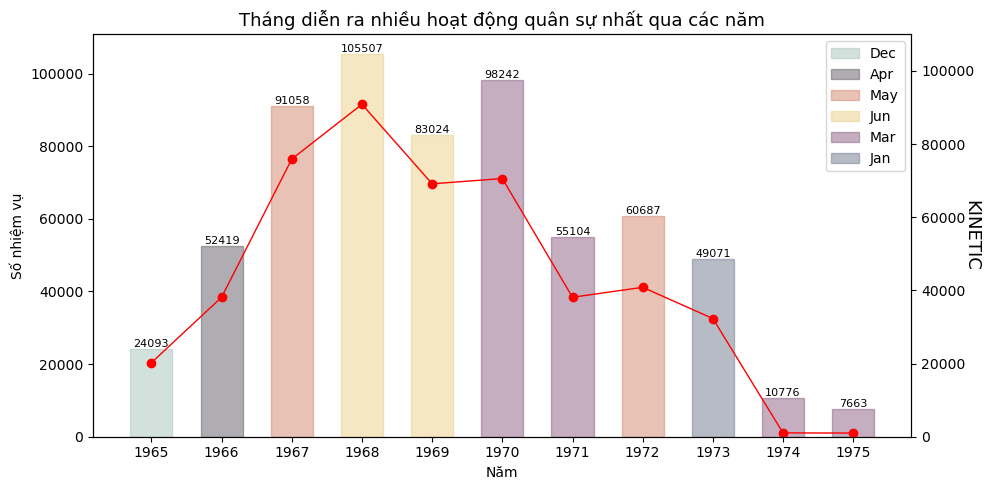

In [19]:
m_u['MSNDATE'] = m_u['MSNDATE'].astype(str)
fig, ax = plt.subplots(figsize=(10,5))
colors = list(m_u['color'])
ax = plt.bar(x=m_u['MSNDATE'], height=m_u['MFUNC_DESC_CLASS'], color='blue', alpha=0.5, width=0.6)
for idx, word in enumerate(m_u['month']):
    ax[idx].set_color(c=colors[idx])
label_msn = []
p_msn = []
m_n = m_u['month'].drop_duplicates()
m_n = list(m_u['month'].drop_duplicates().index)
c_n = list(m_u['month'].drop_duplicates())
for i, name in enumerate(m_n):
    label_msn.append(str(c_n[i]))
    p_msn.append(ax[m_n[i]])
plt.tick_params(axis="both",labelsize=10)
plt.ylabel('Số nhiệm vụ', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.bar_label(ax, fontsize = 8)
plt.legend(p_msn, label_msn)
plt.title("Tháng diễn ra nhiều hoạt động quân sự nhất qua các năm", fontsize = 13)
ax2 = plt.twinx()
ax2.plot(m_u['MSNDATE'], m_u['kinetic'], color="red", marker="o", linewidth = 1)
ax2.set_ylabel("KINETIC", fontsize=13, rotation = 270)
ax2.set_ylim(0,110000)
# plt.grid(which='major', axis='y', zorder=-3.0)
plt.tight_layout()

### Số lượng nhiệm vụ tấn công của các lực lượng quân là bao nhiêu?

In [6]:
bombing_operation['MILSERVICE'].unique()

array(['USAF', 'VNAF', 'USN', 'RLAF', 'USMC', 'KAF', 'RAAF', nan, 'OTHER',
       'USA'], dtype=object)

In [ ]:
choose = ['USAF','VNAF','USN','USMC']
ctry_mis = bombing_operation[['MILSERVICE','MFUNC_DESC_CLASS']].dropna()
ctry_mis = ctry_mis[ctry_mis['MFUNC_DESC_CLASS'] == 'KINETIC']
ctry_mis = ctry_mis.groupby(['MILSERVICE'], as_index = False).count()
ctry_mis1 = pd.DataFrame()
for i in choose:
    tam = ctry_mis.loc[ctry_mis['MILSERVICE'] == i]
    ctry_mis1 = pd.concat([ctry_mis1,tam])
ctry_mis1.sort_values(by = 'MILSERVICE',inplace = True, ascending = True)

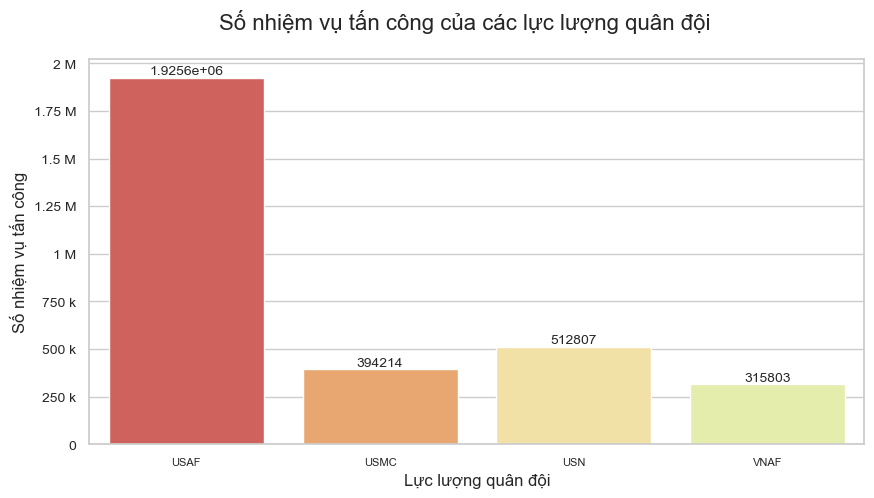

In [63]:
sns.set_theme(style="whitegrid", palette="Spectral")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'MILSERVICE', y= 'MFUNC_DESC_CLASS',data = ctry_mis1)
ax.yaxis.set_major_formatter(mpt.EngFormatter())
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
ax.tick_params(axis="x",labelsize=10)
ax.tick_params(axis="y",labelsize=10)
ax.set_xlabel("Lực lượng quân đội", fontsize=12)
ax.set_ylabel("Số nhiệm vụ tấn công", fontsize=12)
fig.suptitle("Số nhiệm vụ tấn công của các lực lượng quân đội", fontsize = 16);

### Số nhiệm vụ tấn công của từng lực lượng quân sự qua các năm

In [140]:
ctrypy = bombing_operation[['MSNDATE', 'MILSERVICE','MFUNC_DESC_CLASS']].dropna()
ctrypy = ctrypy[ctrypy['MFUNC_DESC_CLASS'] == 'KINETIC']
ctrypy['MSNDATE'] = ctrypy['MSNDATE'].dt.to_period('Y')
ctrypy = ctrypy.groupby(['MSNDATE','MILSERVICE'], as_index = False).count()
choose = ['USAF','VNAF','USN','USMC']
country = []
for i in choose:
    df = pd.DataFrame()
    df = ctrypy.loc[ctrypy['MILSERVICE'] == i]
    country.append(df)

In [141]:
def draw_miss(df,ax,title,color):
    ax = sns.barplot(x='MSNDATE', y='MFUNC_DESC_CLASS', data=df, color=color)
    ax.yaxis.set_major_formatter(mpt.EngFormatter())
    for i in ax.containers:
        ax.bar_label(i,fontsize=26)
    ax.tick_params(axis="x",labelsize=27)
    ax.tick_params(axis="y",labelsize=27)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_title("{}".format(title), fontsize = 32);

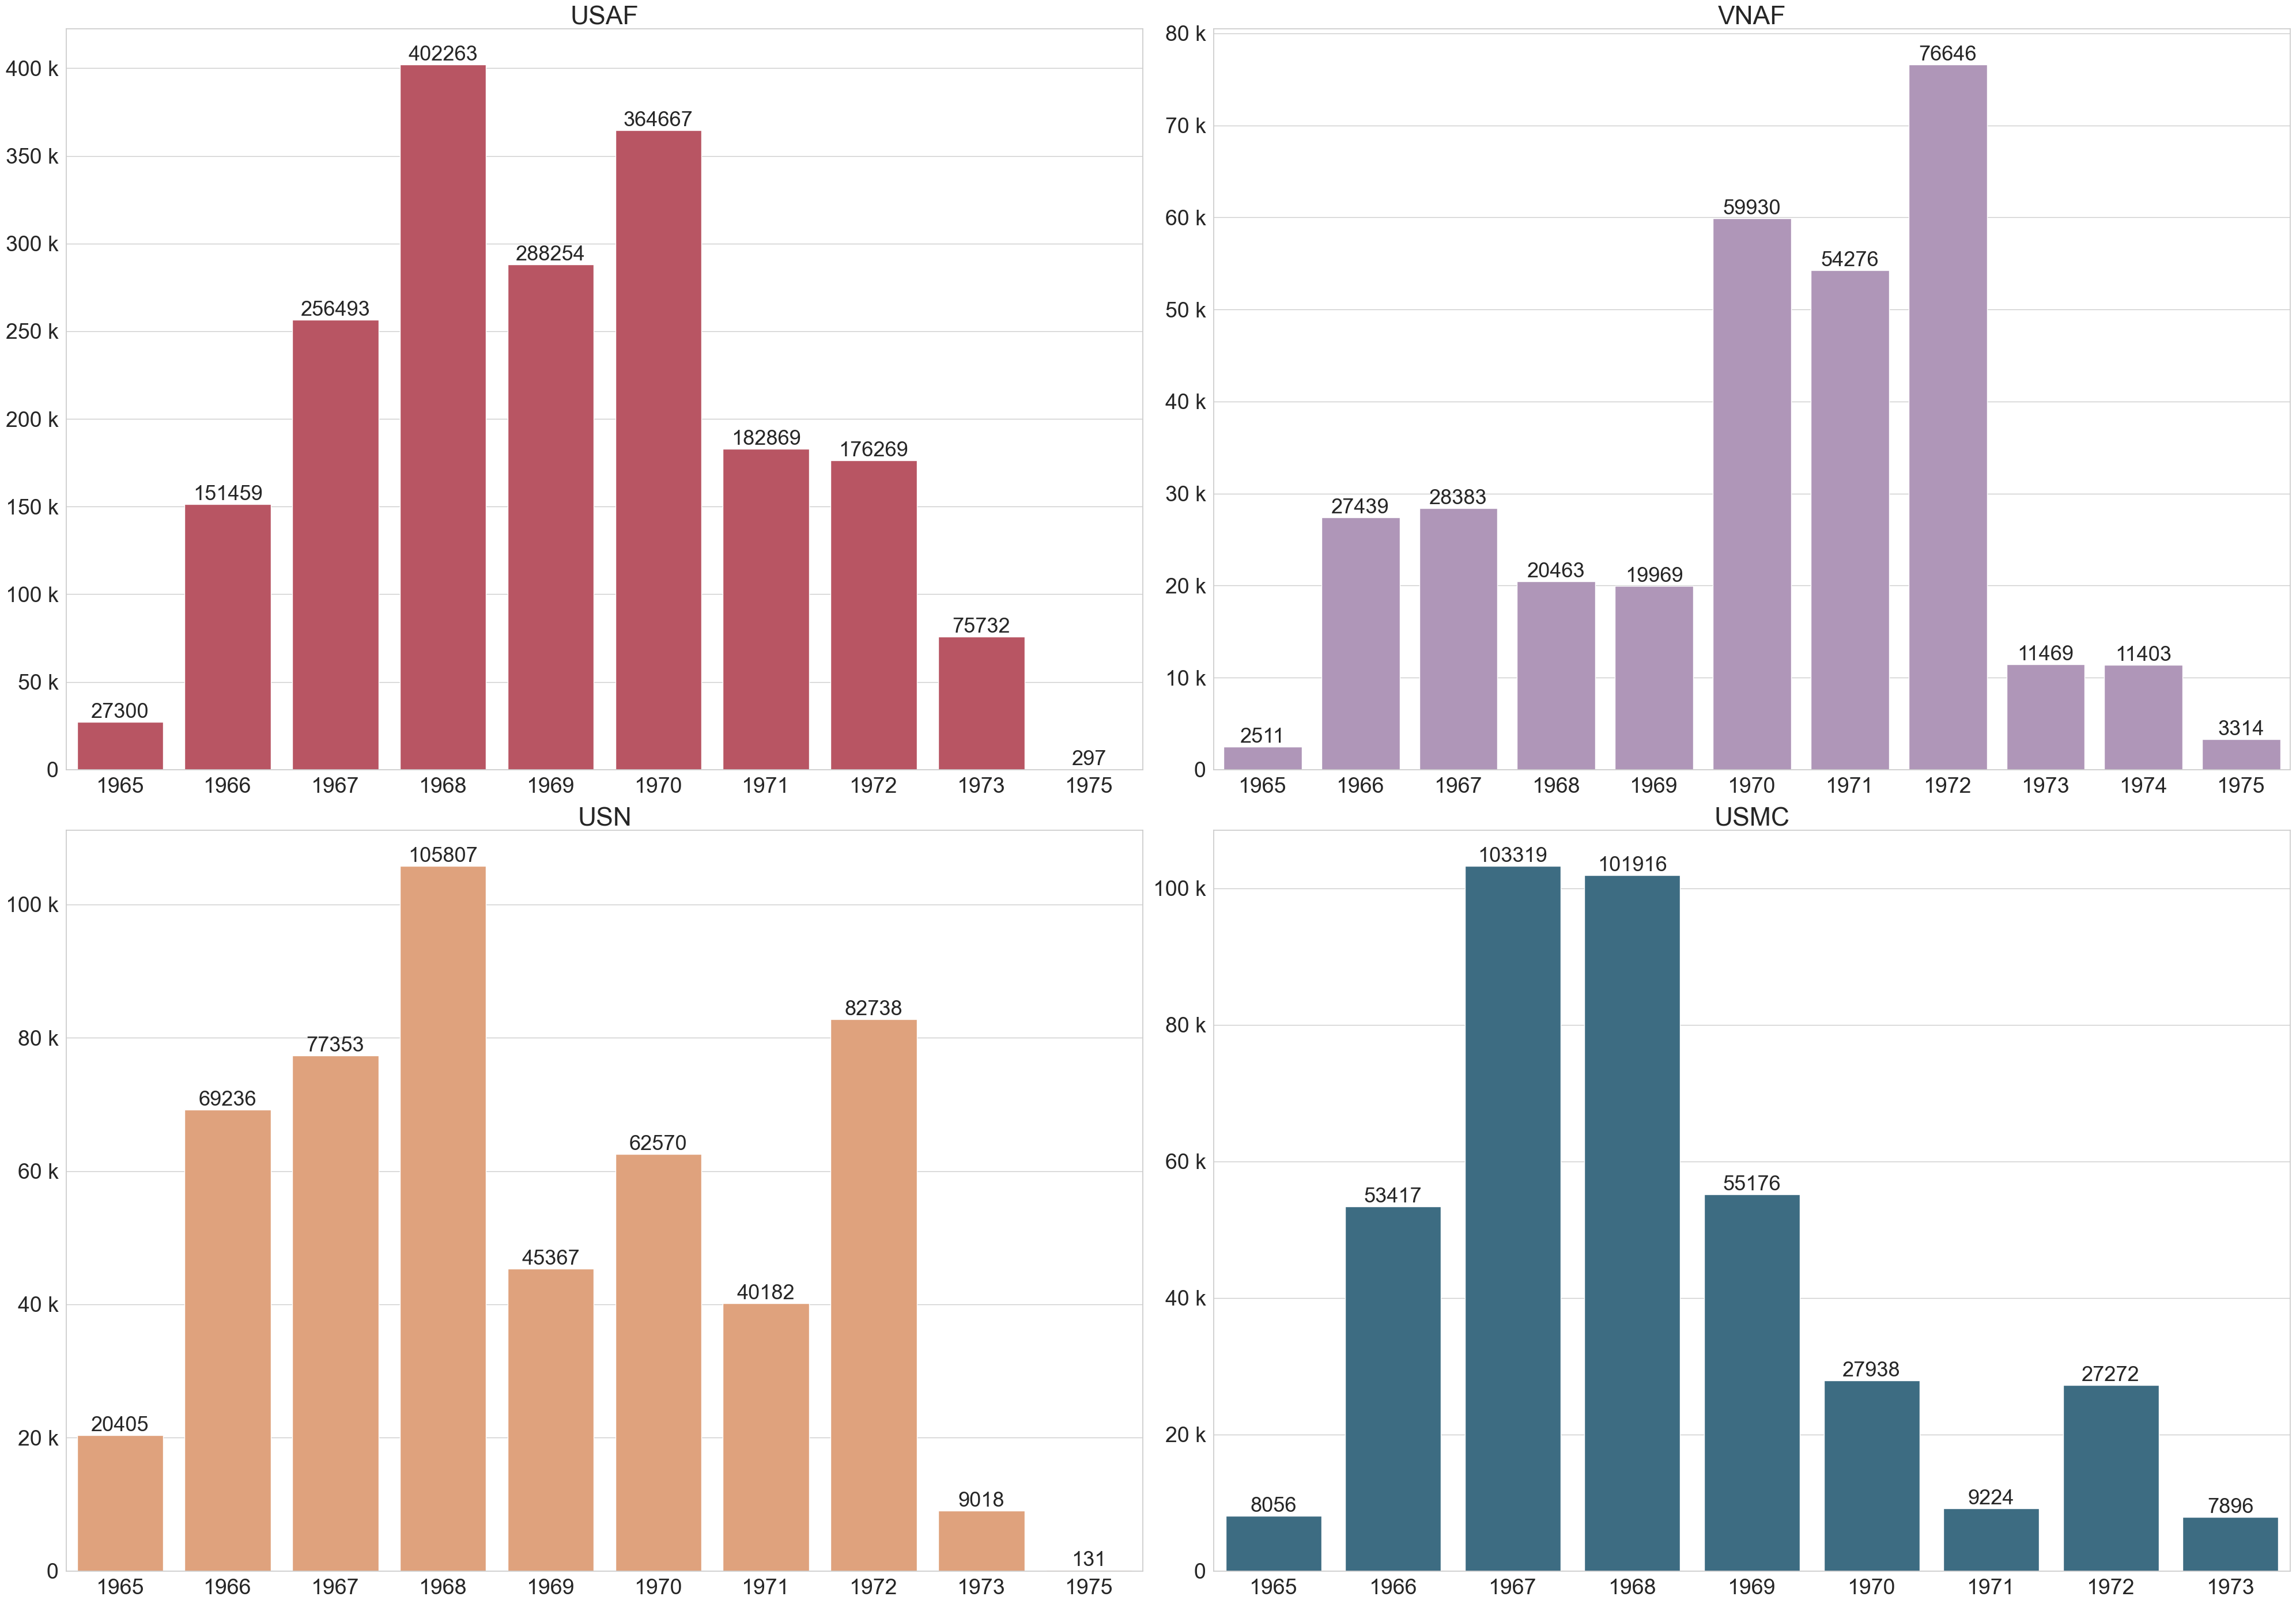

In [142]:
sns.set_theme(style="whitegrid")
color = ['#C84557','#B191BD','#EF9E6D','#32708D']
fig = plt.figure(figsize = [40,28])
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    draw_miss(country[i],ax,choose[i],color[i])
fig.tight_layout()
plt.show()

### Bản đồ địa điểm bị tấn công

In [173]:
map_attacked = bombing_operation[['TGTLATDD_DDD_WGS84','TGTLONDDD_DDD_WGS84','NUMWEAPONSDELIVERED']].dropna()
map_attacked = map_attacked.loc[map_attacked['NUMWEAPONSDELIVERED'] > 0]
map_attacked['Số lần bị tấn công'] = 1
map_attacked = map_attacked.groupby(['TGTLATDD_DDD_WGS84','TGTLONDDD_DDD_WGS84'], as_index = False).sum()
map_attacked = map_attacked.loc[map_attacked['NUMWEAPONSDELIVERED'] > 150]
map_attacked = map_attacked.rename(columns = {"TGTLATDD_DDD_WGS84":"Vĩ độ", 
                                              "TGTLONDDD_DDD_WGS84":"Kinh độ", 
                                              "NUMWEAPONSDELIVERED":"Lượng bom"})

In [174]:
fig = px.scatter_mapbox(map_attacked,
                       lon = 'Kinh độ',
                       lat = 'Vĩ độ',
                       color = 'Lượng bom',
                       size = 'Lượng bom',
                       hover_data= ['Số lần bị tấn công'],
                       center=dict(lat=12.702571, lon=106.424241),
                       color_continuous_scale='viridis_r',
                       zoom=4,
                       mapbox_style='carto-positron',
                       title='Địa điểm bị tấn công trong chiến tranh')
fig.write_html("dia_diem_bi_tan_cong.html")

### Bản đồ địa điểm bị tấn công theo năm

In [180]:
attacked_year = bombing_operation[['MSNDATE','TGTLATDD_DDD_WGS84', 
                                   'TGTLONDDD_DDD_WGS84','NUMWEAPONSDELIVERED']].dropna()
attacked_year = attacked_year.loc[attacked_year['NUMWEAPONSDELIVERED'] > 0]
attacked_year['Số lần bị tấn công'] = 1
attacked_year['MSNDATE'] = attacked_year['MSNDATE'].dt.to_period('Y')
attacked_year = attacked_year.groupby(['MSNDATE','TGTLATDD_DDD_WGS84','TGTLONDDD_DDD_WGS84'], as_index = False).sum()
attacked_year['MSNDATE'] = attacked_year['MSNDATE'].astype(str)
attacked_year = attacked_year.rename(columns = {"TGTLATDD_DDD_WGS84":"Vĩ độ", 
                                              "TGTLONDDD_DDD_WGS84":"Kinh độ", 
                                              "NUMWEAPONSDELIVERED":"Lượng bom",
                                              "MSNDATE": "Năm"})

In [187]:
fig = px.scatter_mapbox(attacked_year,
                       lon = 'Kinh độ',
                       lat = 'Vĩ độ',
                       color = 'Lượng bom',
                       size = 'Lượng bom',
                       hover_data= ['Số lần bị tấn công'],
                       center=dict(lat=12.702571, lon=106.424241),
                       color_continuous_scale='viridis',
                       zoom=4,
                       mapbox_style='carto-positron',
                       animation_frame='Năm',
                       title='Địa điểm bị tấn công theo từng năm')
fig.write_html("dia_diem_bi_tan_cong_theo_nam.html")

## Dự báo

### Mã hóa dữ liệu

In [29]:
predict_data = pd.DataFrame()
predict_data = bombing_operation.copy()

In [30]:
predict_data['NUMWEAPONSDELIVERED'] = np.where(predict_data['NUMWEAPONSDELIVERED'].between(0,2000,inclusive='left'), 1, predict_data['NUMWEAPONSDELIVERED'])
predict_data['NUMWEAPONSDELIVERED'] = np.where(predict_data['NUMWEAPONSDELIVERED'].between(2000,4000,inclusive='left'), 2, predict_data['NUMWEAPONSDELIVERED'])
predict_data['NUMWEAPONSDELIVERED'] = np.where(predict_data['NUMWEAPONSDELIVERED'].between(4000,6000,inclusive='left'), 3, predict_data['NUMWEAPONSDELIVERED'])
predict_data['NUMWEAPONSDELIVERED'] = np.where(predict_data['NUMWEAPONSDELIVERED'].between(6000,8000,inclusive='left'), 4, predict_data['NUMWEAPONSDELIVERED'])
predict_data['NUMWEAPONSDELIVERED'] = np.where(predict_data['NUMWEAPONSDELIVERED'].between(8000,10000,inclusive='left'), 5, predict_data['NUMWEAPONSDELIVERED'])
predict_data['PERIODOFDAY'] = predict_data['PERIODOFDAY'].map({'D': 1, 'N': 2})
predict_data['YEAR'] = predict_data['MSNDATE'].dt.year
predict_data['MONTH'] = predict_data['MSNDATE'].dt.month

In [31]:
predict_data = predict_data.loc[:,['NUMWEAPONSDELIVERED','MILSERVICE',
                                    'YEAR','MONTH','PERIODOFDAY',
                                    'TGTCLOUDCOVER','COUNTRYFLYINGMISSION',
                                    'TGTCOUNTRY', 'MFUNC_DESC_CLASS']].dropna()
predict_data.reset_index(inplace=True)
predict_data.drop('index', axis=1, inplace = True)

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()

In [33]:
col = predict_data.columns
col_n = list(col)
for i in col_n:
    if i == 'YEAR':
        continue
    predict_data[i] = LE.fit_transform(predict_data[i])

In [34]:
predict_data

,NUMWEAPONSDELIVERED,MILSERVICE,YEAR,MONTH,PERIODOFDAY,TGTCLOUDCOVER,COUNTRYFLYINGMISSION,TGTCOUNTRY,MFUNC_DESC_CLASS
0,0,3,1970.0,4,0,2,0,1,0
1,0,3,1970.0,4,0,4,0,1,0
2,0,3,1965.0,10,0,5,0,2,0
3,0,1,1970.0,7,0,2,0,1,0
4,0,1,1970.0,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...
2061127,0,3,1965.0,11,0,2,0,2,1
2061128,0,3,1965.0,11,0,2,0,4,1
2061129,0,3,1965.0,11,1,2,0,2,1
2061130,0,3,1965.0,11,1,1,0,2,1


### Trích chọn đặc trưng

#### Phương pháp Feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
X = predict_data.drop(['MFUNC_DESC_CLASS','YEAR'], axis=1)
y = predict_data['MFUNC_DESC_CLASS'].copy()

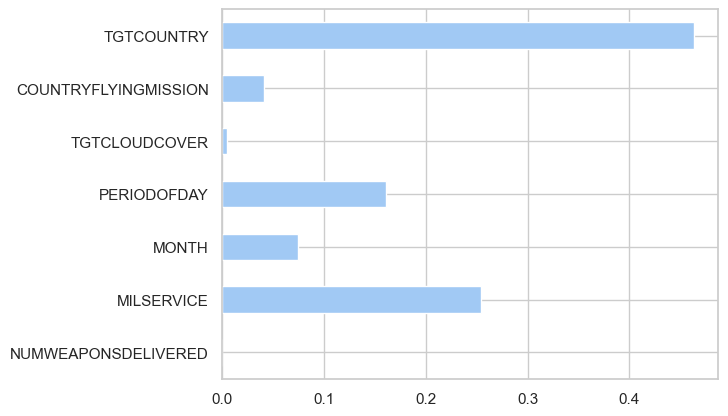

In [36]:
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.plot(kind = 'barh')
plt.show()

#### Phương pháp Correlation with Heatmap

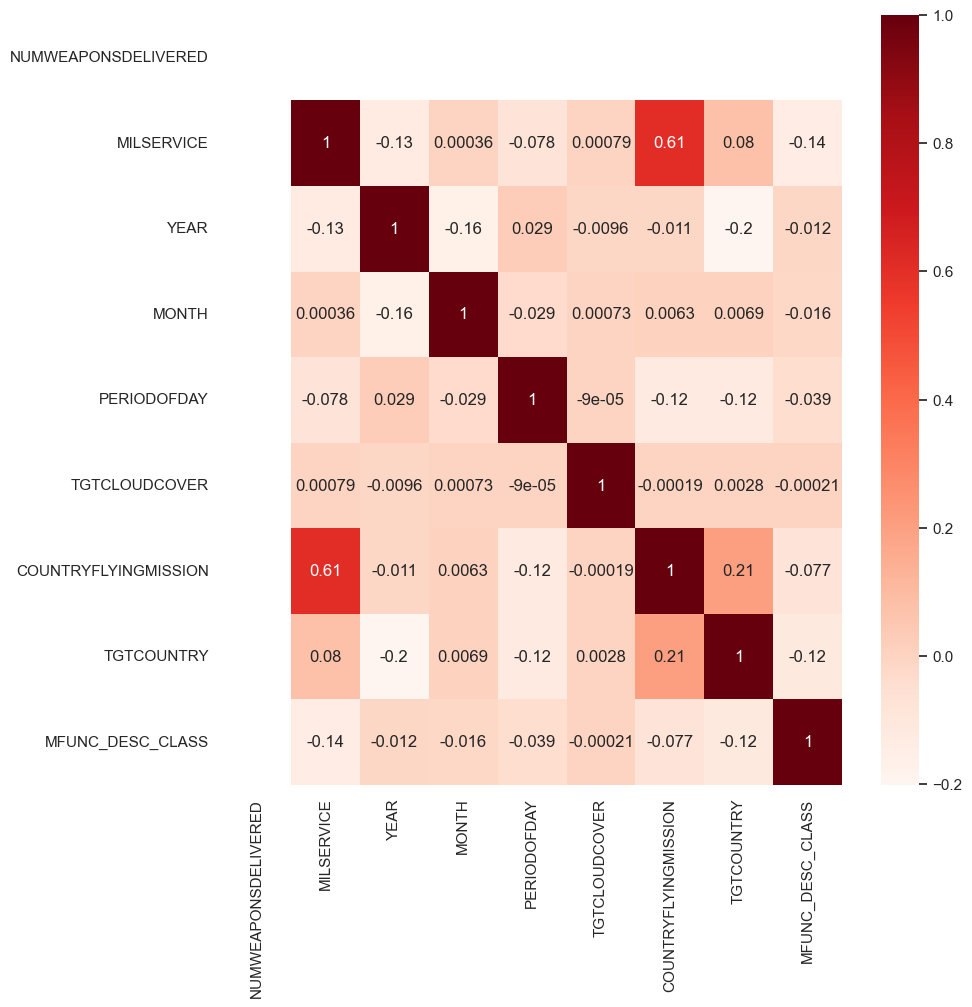

In [37]:
corrmat = predict_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.heatmap(predict_data[top_corr_features].corr(), annot= True, cmap=plt.cm.Reds)

### Xây dựng mô hình dự đoán

In [38]:
X = predict_data.drop(['MFUNC_DESC_CLASS',
                        'TGTCLOUDCOVER',
                        'NUMWEAPONSDELIVERED'], axis=1)
y = predict_data['MFUNC_DESC_CLASS'].copy()

In [39]:
from sklearn.model_selection import train_test_split
for seed in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3, random_state=seed)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [41]:
print("R2 for train set: {}".format(model.score(X_train, y_train)))
print("R2 for test set: {}".format(model.score(X_test, y_test)))

R2 for train set: 0.8021918613355217
R2 for test set: 0.8014199307824175


### Sử dụng mô hình

NUMWEAPONSDELIVERED:   0-2000: , >8000: , 4000-6000: , 6000-8000: , 2000-4000: 

MILSERVICE:           'USN':3, 'USAF':1, 'USMC':2, 'VNAF':4, 'USA':0

YEAR	              

MONTH     :            5, 11,  8,  2,  1, 10,  4, 12,  9,  3,  6,  7
=>                     4, 10,  7,  1,  0,  9,  3, 11,  8,  2,  5,  6

PERIODOFDAY:           D: 1 , N: 2

TGTCLOUDCOVER:        
                      
COUNTRYFLYINGMISSION: 'UNITED STATES OF AMERICA': 0, 'VIETNAM (SOUTH)': 1

TGTCOUNTRY:           'LAOS': 1, 'NORTH VIETNAM': 2, 'SOUTH VIETNAM': 4, 'CAMBODIA': 0, 'THAILAND': 5,
                      'UNKNOWN': 6, 'WESTPAC WATERS': 7, 'PHILLIPINES': 3
                      
MFUNC_DESC_CLASS:     'KINETIC': 0, 'NONKINETIC': 1

USAF
2023
Tháng 5
Ban ngày
Mỹ tấn công
Miền nam Việt Nam

In [27]:
# Hệ số hồi quy
model.coef_

array([[-0.46679174, -0.12084798, -0.02036982, -0.35500861,  0.21418303,
        -0.23037804]])

In [28]:
# Hệ số chặn
model.intercept_

array([0.53162072])

In [42]:
import math
logit = 0.53162072 + -0.46679174*1 + -0.12084798*2023 + -0.02036982*2023 + -0.35500861*1 + 0.21418303*0+ 0.21418303*4
p = 1/(1+math.exp(-logit))
if p >= 0.5:
    print ("NONKINETIC")
else:
    print ("KINETIC")

KINETIC
